In [1]:
# Data Explore

In [2]:
wadiz_df_original = pd.read_csv('wadiz_df_0329_1.csv', index_col=0)
user_comment = pd.read_csv('user_data_all_0329.csv', index_col=0)
provider_comment = pd.read_csv('provider_data_all_0329.csv', index_col=0)
#wadiz_provider_analysis = pd.read_csv('wadiz_provider_analysis_0329.csv', index_col=0)
wadiz_df = pd.read_csv('wadiz_provider_analysis_0329.csv', index_col=0)
provider_comment_grammar = pd.read_csv('comment_analysis.csv', index_col=0)

In [3]:
# 각 DataFrame별 샘플 수 비교
print('Original DataFrame :', len(wadiz_df_original))
print('User comment :', len(user_comment['project_id'].value_counts()))
print('Provider comment :', len(provider_comment['project_id'].value_counts()))
print('Provider comment grammar check:', len(provider_comment_grammar['project_id'].value_counts()))
print('Revised DataFrame :', len(wadiz_df))

Original DataFrame : 823
User comment : 720
Provider comment : 614
Provider comment grammar check: 599
Revised DataFrame : 599


* 최종 분석 샘플 : 599개 (0값 제거, grammar_level 측정 가능 샘플만 포함)

## 1. Before Project Start

** (1) Category 분포 **

In [4]:
wadiz_df = wadiz_df.loc[wadiz_df.category.notnull()]

In [5]:
wadiz_df = wadiz_df.loc[wadiz_df['project_id'] != 4490]

10 loops, best of 3: 90 ms per loop
share/public         176
life/fashion         100
tech/design           87
education             46
book/movie            43
music/concert         35
art/photo/exhibit     31
environment           26
sports                17
travel                17
game/comics            7
figure/webtoon         3
Name: category, dtype: int64


C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


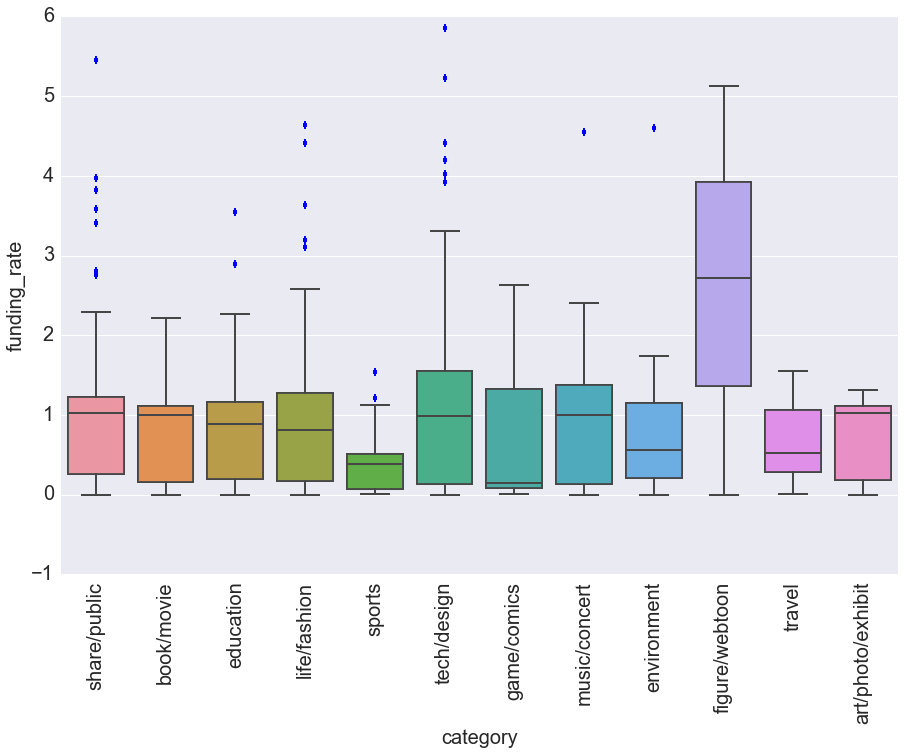

In [6]:
figure = plt.figure(figsize=(15,10))
%timeit sns.boxplot(x = wadiz_df['category'], y = wadiz_df['funding_rate'])
plt.xticks(rotation = 'vertical')
plt.ylim(-1, 6)
print(wadiz_df['category'].value_counts())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('category', fontsize=20)
plt.ylabel('funding_rate', fontsize=20)

In [7]:
#sports는 모두 실패

In [8]:
wadiz_df['success'].count()

588

In [9]:
# category별 성공율
for i in wadiz_df['category'].unique():
    success_percentage = (wadiz_df.loc[wadiz_df['category'] == i]['success'].value_counts()[1] / \
    wadiz_df.loc[wadiz_df['category'] == i]['success'].count())*100
    print("{category} :".format(category = i), round(success_percentage, 2),'%')

share/public : 60.23 %
book/movie : 55.81 %
education : 45.65 %
life/fashion : 48.0 %
sports : 23.53 %
tech/design : 49.43 %
game/comics : 42.86 %
music/concert : 57.14 %
environment : 46.15 %
figure/webtoon : 66.67 %
travel : 29.41 %
art/photo/exhibit : 54.84 %


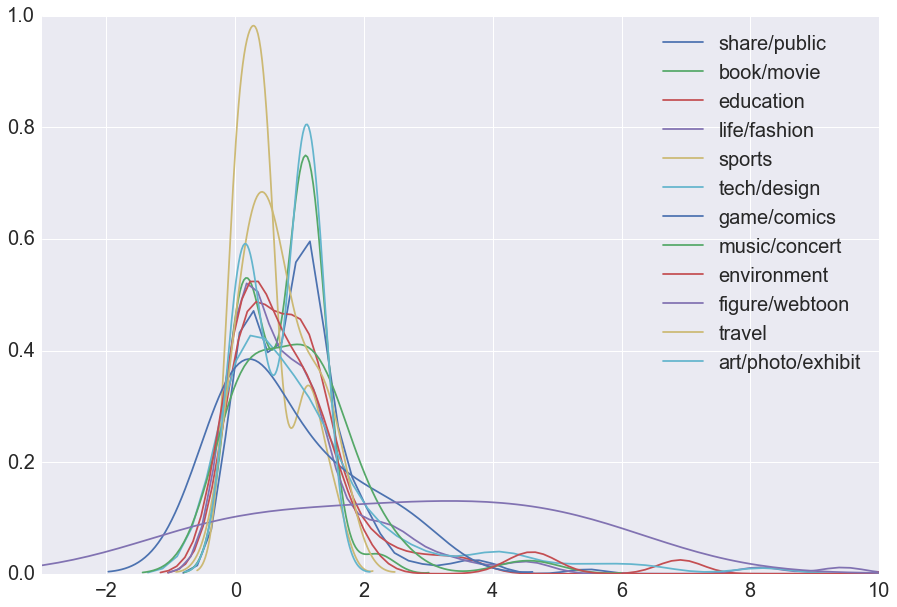

In [10]:
figure = plt.figure(figsize=(15,10))
for i in wadiz_df['category'].unique():
    sns.kdeplot(wadiz_df.loc[wadiz_df['category'] == '{i}'.format(i=i)]['funding_rate'], label = '{i}'.format(i=i))
    plt.xlim(-3, 10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20)
# 비슷한 분포를 그림

sports success percentage : 23.5294117647 %
figure/webtoon : 66.6666666667 %
life/fashion : 48.0 %


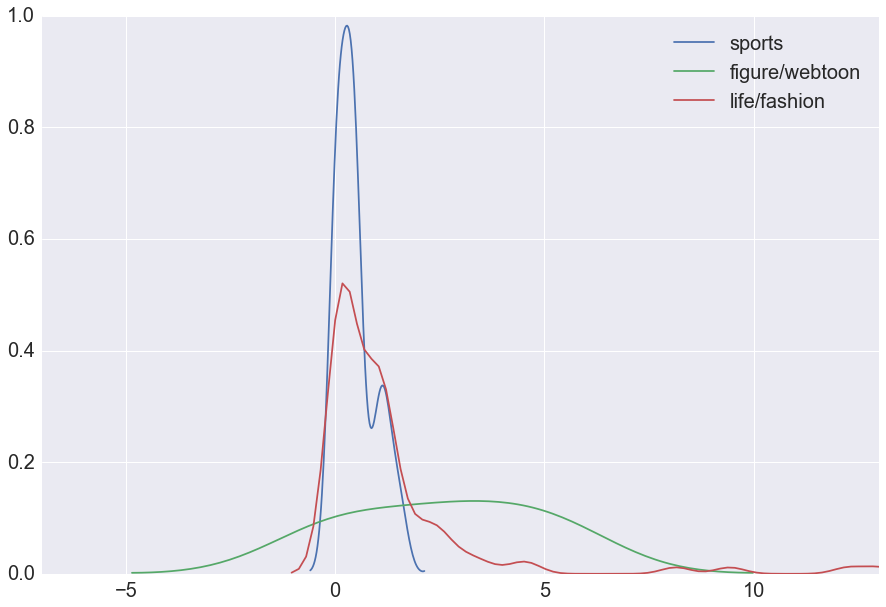

In [11]:
plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['category'] == 'sports']['funding_rate'], label = 'sports')
sns.kdeplot(wadiz_df.loc[wadiz_df['category'] == 'figure/webtoon']['funding_rate'], label = 'figure/webtoon')
sns.kdeplot(wadiz_df.loc[wadiz_df['category'] == 'life/fashion']['funding_rate'], label = 'life/fashion')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20)
plt.xlim([-7, 13])
sports_success_percentage = (wadiz_df.loc[wadiz_df['category'] == 'sports']['success'].value_counts()[1] / \
                             wadiz_df.loc[wadiz_df['category'] == 'sports']['success'].count())*100
figure_success_percentage = (wadiz_df.loc[wadiz_df['category'] == 'figure/webtoon']['success'].value_counts()[1] / \
                             wadiz_df.loc[wadiz_df['category'] == 'figure/webtoon']['success'].count())*100
life_success_percentage = (wadiz_df.loc[wadiz_df['category'] == 'life/fashion']['success'].value_counts()[1] / \
                             wadiz_df.loc[wadiz_df['category'] == 'life/fashion']['success'].count())*100
print('sports success percentage :', sports_success_percentage, '%'),
print('figure/webtoon :', figure_success_percentage, '%'),
print('life/fashion :', life_success_percentage, '%')

** (2) Area 분포 **

seoul       383
kyungki     105
busan        19
incheon      15
kyungbuk     12
chungnam      8
deagu         8
jeonbuk       8
chungbuk      7
deajeon       6
kangwon       6
kyungnam      4
gwangju       3
jeonnam       1
sejong        1
ulsan         1
jeju          1
Name: area, dtype: int64


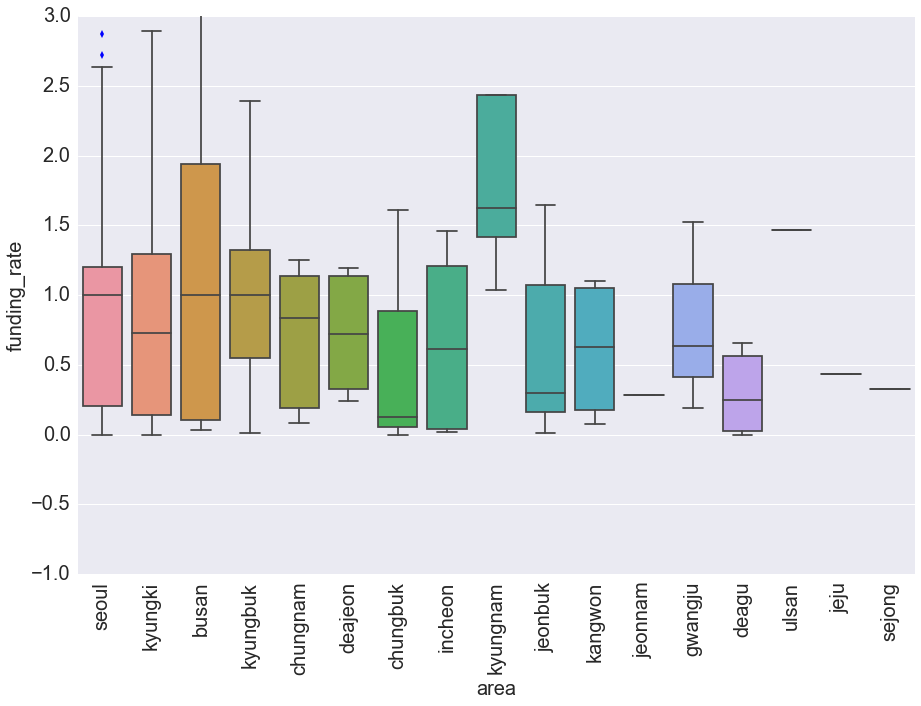

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='area', y = 'funding_rate', data=wadiz_df)
plt.xticks(rotation = 'vertical', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1,3)
plt.xlabel('area', fontsize=20)
plt.ylabel('funding_rate', fontsize=20)
print(wadiz_df['area'].value_counts())

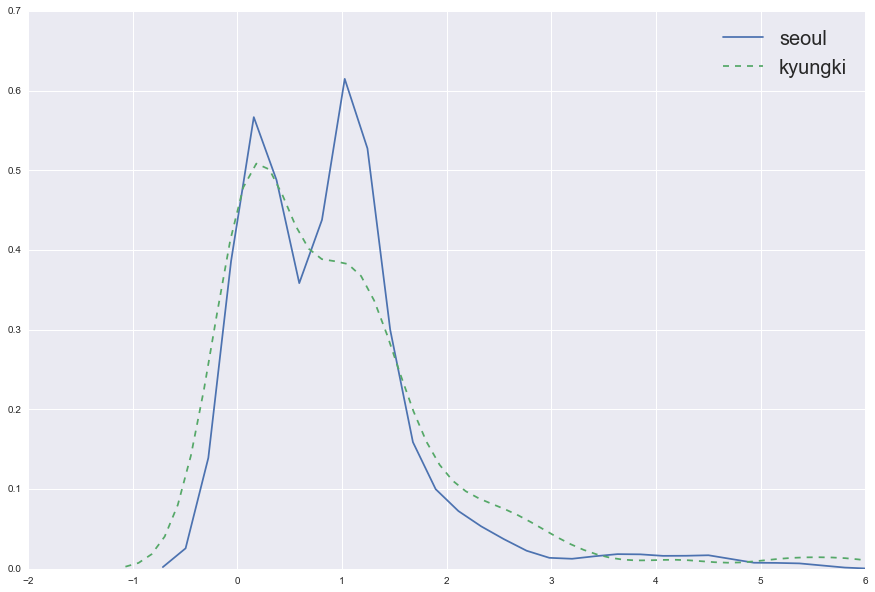

In [13]:
plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['area'] == 'seoul']['funding_rate'], label = 'seoul')
sns.kdeplot(wadiz_df.loc[wadiz_df['area'] == 'kyungki']['funding_rate'], label = 'kyungki', linestyle = '--')
plt.xlim(-2, 6)
plt.legend(fontsize = 20)

In [14]:
type(wadiz_df.date_duration[0]), wadiz_df.date_duration[0]

(str, '51 days 00:00:00.000000000')

In [15]:
# 기간 처리
wadiz_df['date_duration'] = wadiz_df['date_duration'].apply(lambda x: int(x[:-24]))

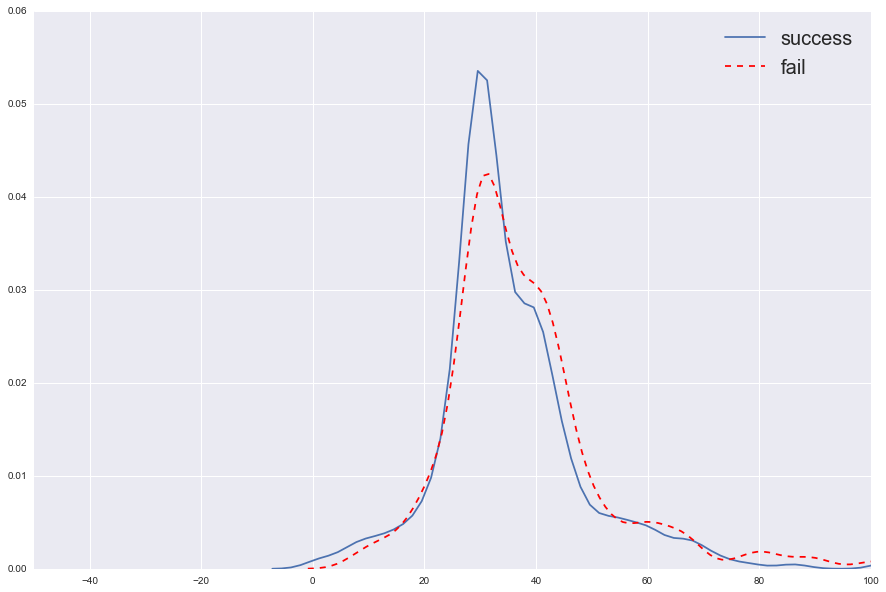

In [16]:
figure = plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['date_duration'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['date_duration'], label = 'fail', c='r', linestyle='--')
plt.xlim(-50, 100)
plt.legend(fontsize = 20)

** (3) 목표설정금액 vs 최종금액 **

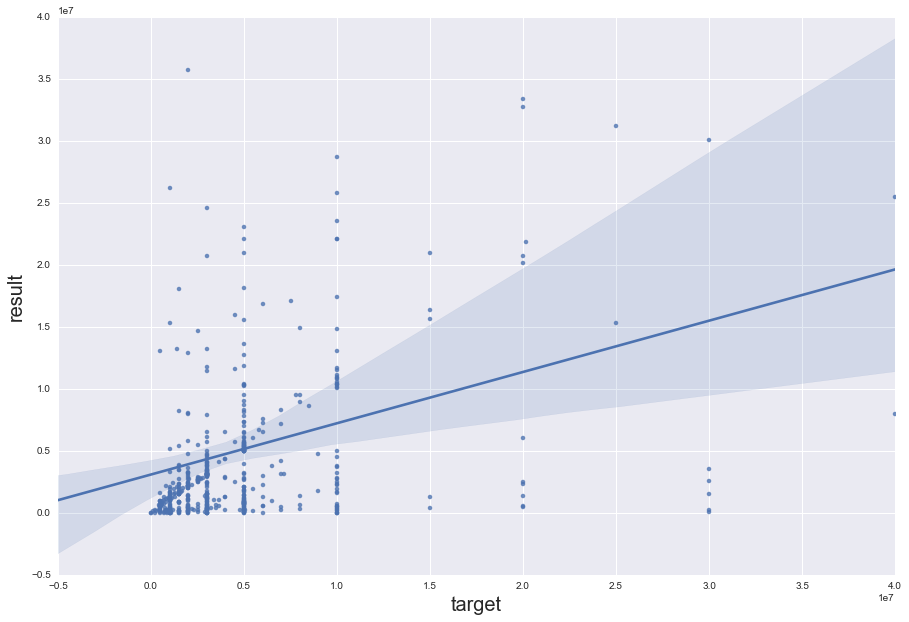

In [17]:
plt.figure(figsize=(15,10))
sns.regplot(wadiz_df['target'], wadiz_df['result'])
plt.xlim(-5000000, 40000000)
plt.ylim(-5000000, 40000000)
plt.xlabel(u'target', fontsize = 20)
plt.ylabel(u'result', fontsize=20)

(-1000000, 15000000)

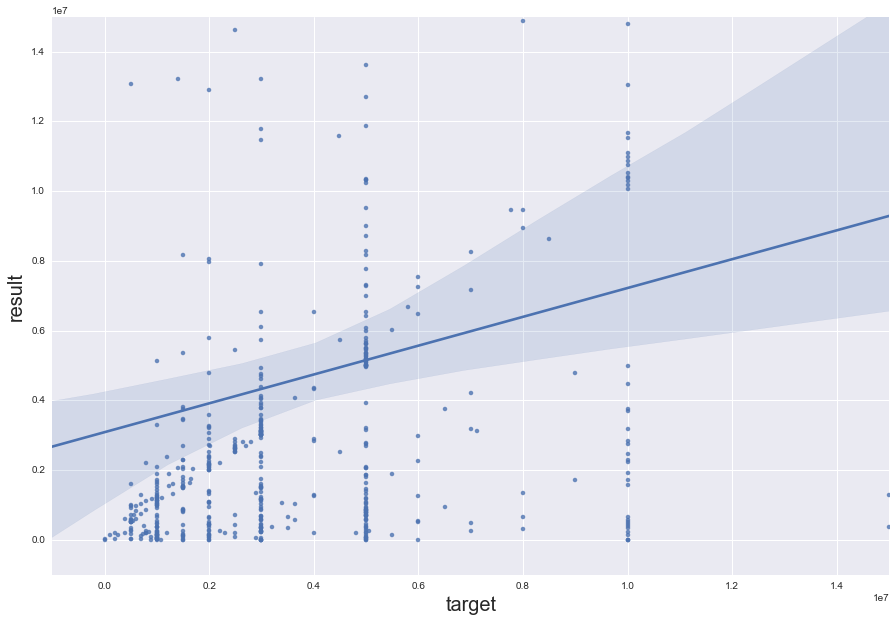

In [18]:
plt.figure(figsize=(15,10))
sns.regplot(wadiz_df['target'], wadiz_df['result'])
plt.xlabel(u'target', fontsize = 20)
plt.ylabel(u'result', fontsize=20)
plt.xlim(-1000000, 15000000)
plt.ylim(-1000000, 15000000)
#target_result = pd.DataFrame([wadiz_df['target'], wadiz_df['result']]).T
#print('<correalation>'),
#target_result.corr(method = 'pearson')

** (4) 계절 분포 **

<월별 프로젝트 수>
11    72
1     71
12    65
10    62
8     61
9     45
7     41
6     41
2     39
5     36
4     29
3     26
Name: month, dtype: int64


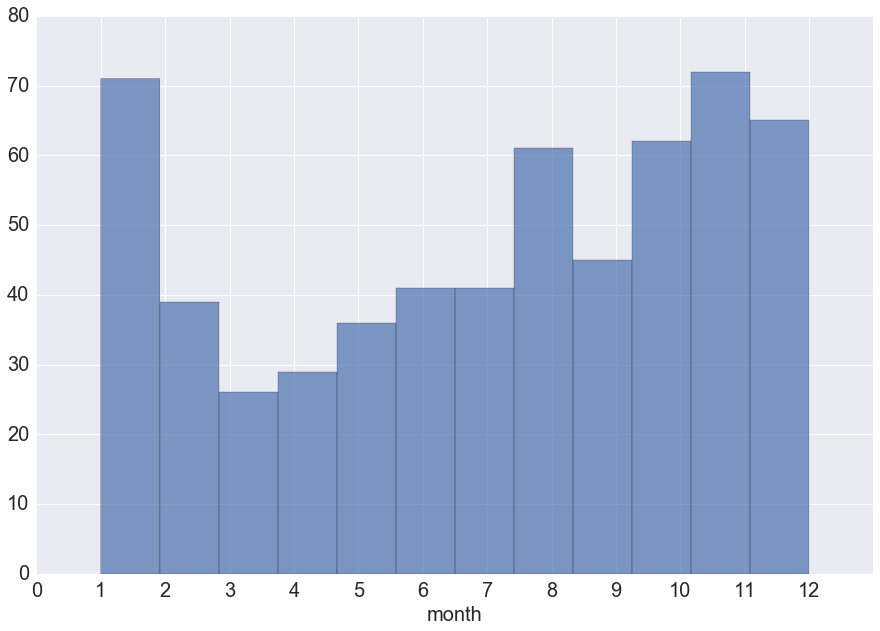

In [19]:
plt.figure(figsize=(15,10))
plt.hist(wadiz_df['month'], bins = 12, align = 'mid', alpha = 0.7)
plt.xticks(range(0, 13),fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 13])
plt.xlabel('month', fontsize=20)
print('<월별 프로젝트 수>')
print(wadiz_df['month'].value_counts())

<월별 성공/실패 분포>


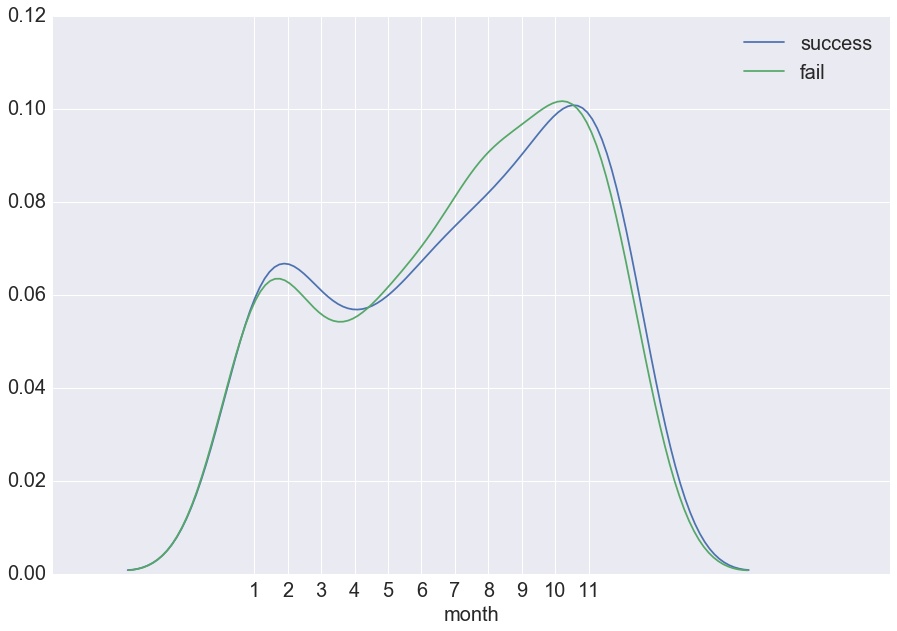

In [20]:
plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] ==1]['month'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] ==0]['month'], label = 'fail')
plt.xticks(range(1, 12), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('month', fontsize=20)
plt.legend(fontsize = 20)
print('<월별 성공/실패 분포>')

In [21]:
# 약간의 수치 차이 있을 것으로 기대

** (5) 개설자 grammar level **

In [22]:
len(wadiz_df)

588

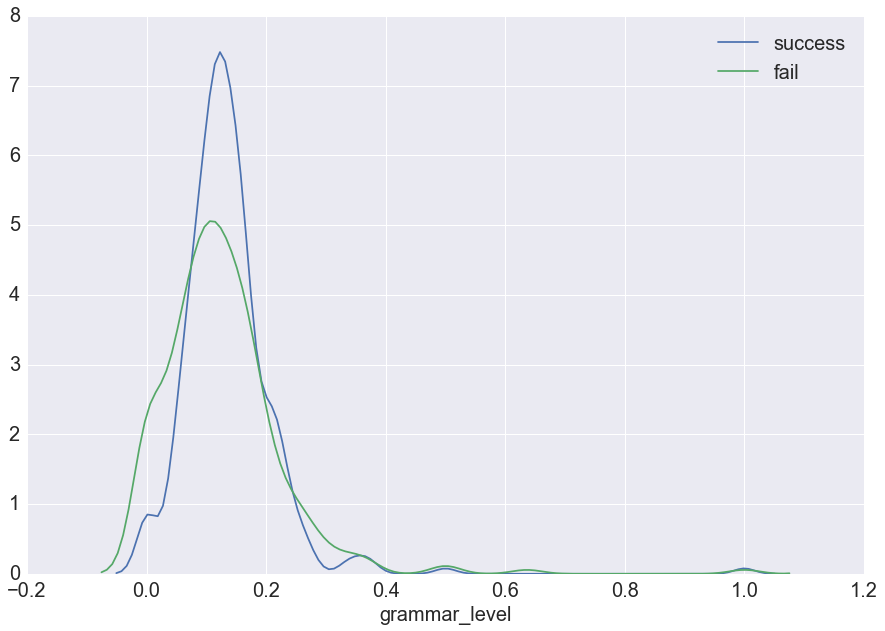

In [23]:
plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['provider_grammar_level'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['provider_grammar_level'], label = 'fail')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('grammar_level', fontsize=20)
plt.legend(fontsize = 20)

In [24]:
wadiz_df['log_grammar_level'] = wadiz_df['provider_grammar_level'].apply(lambda x: np.log(x))

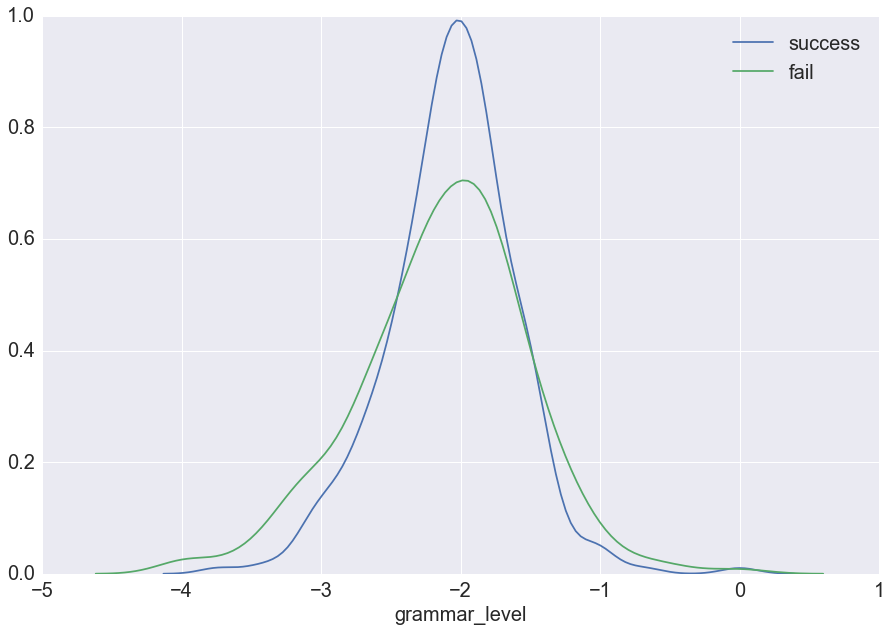

In [25]:
# log scailing
plt.figure(figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['log_grammar_level'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['log_grammar_level'], label = 'fail')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('grammar_level', fontsize=20)
plt.legend(fontsize = 20)

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


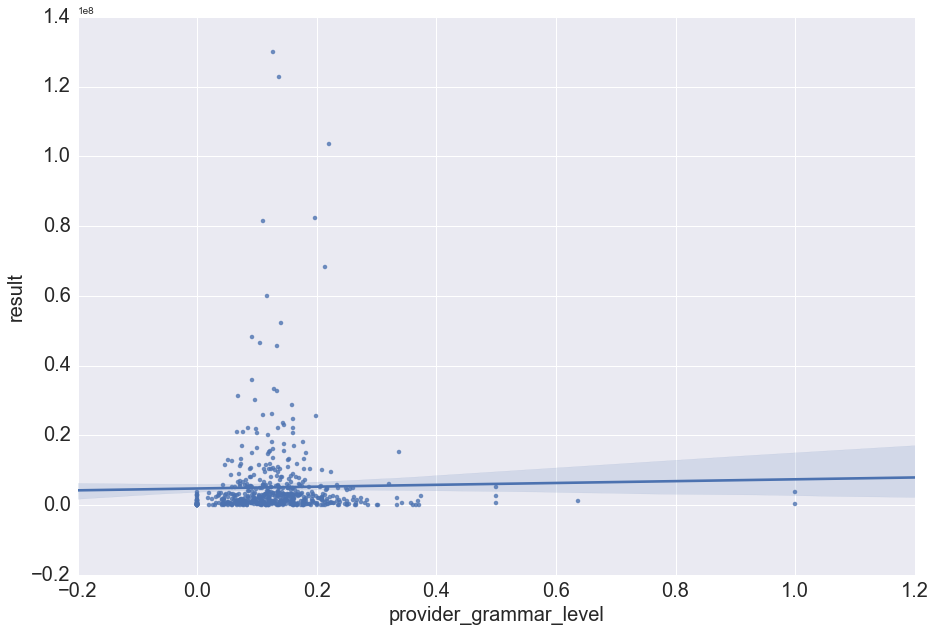

In [26]:
# provider_grammar_level : 0에 가까울수록 높은 grammar 수준 (errors/comment length)
plt.figure(figsize=(15,10))
sns.regplot(x = wadiz_df['provider_grammar_level'], y = wadiz_df['result'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('provider_grammar_level', fontsize=20)
plt.ylabel('result', fontsize=20)
plt.legend(fontsize = 20)

## 2. After Project Start

### 날짜별 누적 funding 금액 (0일~5일)

(-0.5, 1)

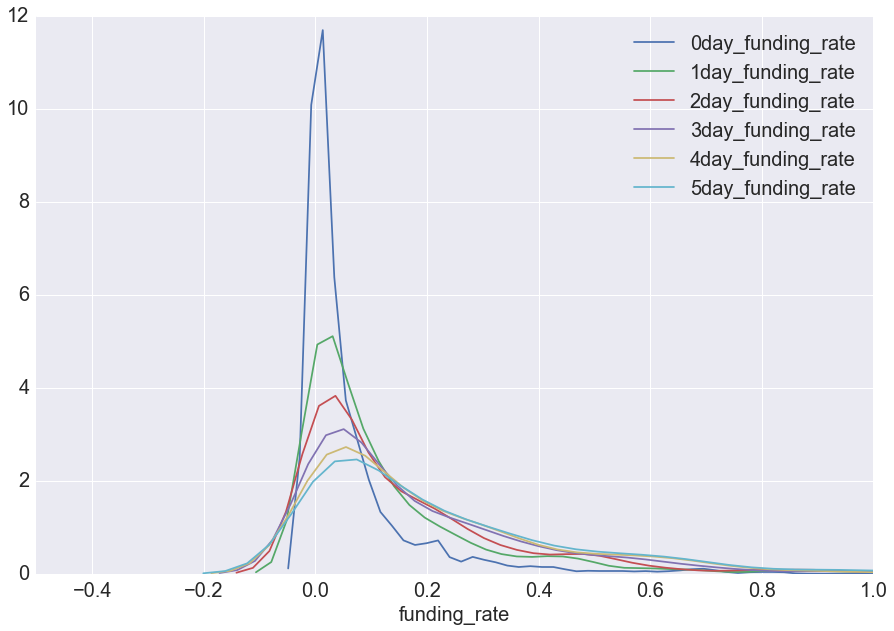

In [27]:
plt.figure(figsize=(15,10))
for i in np.arange(6):
    number = i
    sns.kdeplot(wadiz_df["{number}day_funding_rate".format(number = i)])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('funding_rate', fontsize=20)
plt.ylabel('', fontsize=20)
plt.legend(fontsize = 20)
plt.xlim(-0.5, 1)

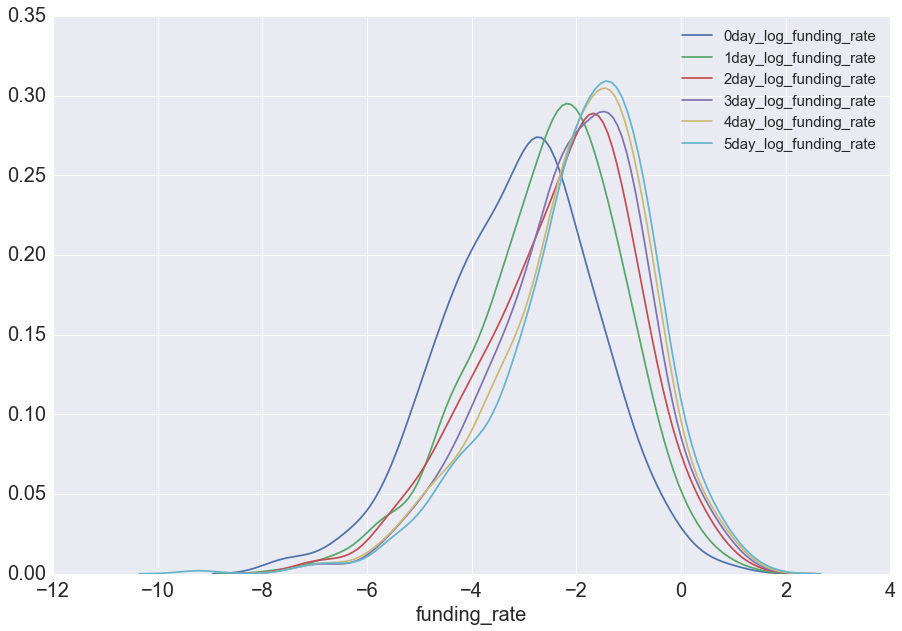

In [28]:
plt.figure(figsize=(15,10))
for i in np.arange(6):
    number = i
    sns.kdeplot(wadiz_df["{number}day_log_funding_rate".format(number = i)])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('funding_rate', fontsize=20)
plt.ylabel('', fontsize=20)
plt.legend(fontsize = 15)

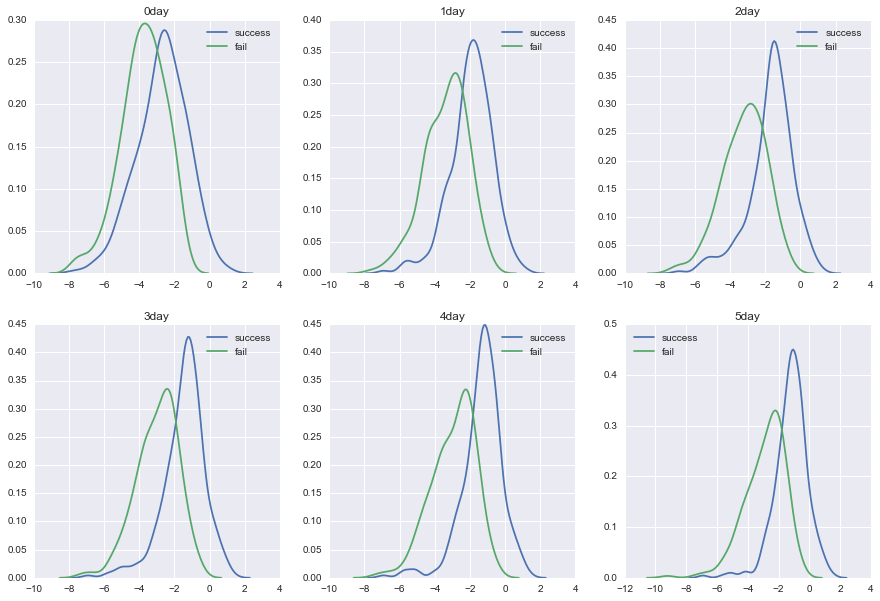

In [29]:
f, ax = plt.subplots(2, 3, figsize=(15,10))
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["0day_log_funding_rate"], label = 'success', ax=ax[0,0])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["0day_log_funding_rate"], label = 'fail', ax=ax[0,0])
ax[0,0].set_title('0day')
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["1day_log_funding_rate"], label = 'success', ax=ax[0,1])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["1day_log_funding_rate"], label = 'fail', ax=ax[0,1])
ax[0,1].set_title('1day')
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["2day_log_funding_rate"], label = 'success', ax=ax[0,2])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["2day_log_funding_rate"], label = 'fail', ax=ax[0,2])
ax[0,2].set_title('2day')
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["3day_log_funding_rate"], label = 'success', ax=ax[1,0])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["3day_log_funding_rate"], label = 'fail', ax=ax[1,0])
ax[1,0].set_title('3day')
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["4day_log_funding_rate"], label = 'success', ax=ax[1,1])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["4day_log_funding_rate"], label = 'fail', ax=ax[1,1])
ax[1,1].set_title('4day')
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 1]["5day_log_funding_rate"], label = 'success', ax=ax[1,2])
sns.kdeplot(wadiz_df.loc[wadiz_df["success"] == 0]["5day_log_funding_rate"], label = 'fail', ax=ax[1,2])
ax[1,2].set_title('5day')
